<a href="https://colab.research.google.com/github/Krishna022005/Project1/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [18]:
#load the datset
df = pd.read_csv('/content/Default_Fin.csv')
print(df)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]


In [19]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [20]:
print(df.columns)

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')


In [21]:
#preprocess missing values
df.isnull().sum()

,0
Index,0
Employed,0
Bank Balance,0
Annual Salary,0
Defaulted?,0


In [22]:
# EDA (Exploratory Data Analysis)
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

Shape: (10000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB
None
Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64


In [23]:
print(df.columns)

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')


In [26]:
# Preprocessing
df.drop("Index", axis=1, inplace=True)

In [28]:
# Features and target
X = df.drop("Defaulted?", axis=1)
y = df["Defaulted?"]

In [29]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [30]:
# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#train the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [33]:
results = {}

In [34]:
for name , model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

In [35]:
#display results
for name , metrices in results.items():
  print(f"{name}:")
  print(f"Accuracy: {metrices['accuracy']}")
  print(f"Precision: {metrices['precision']}")
  print(f"Recall: {metrices['recall']}")

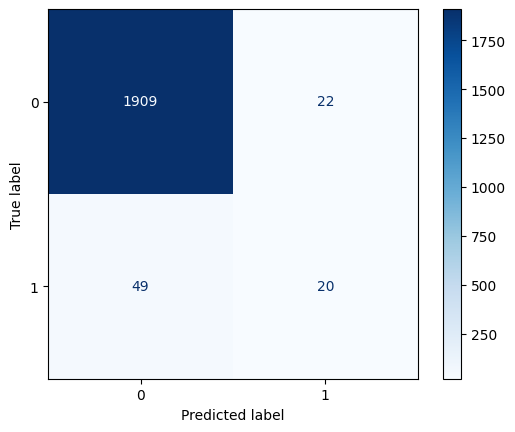

In [37]:
# Assuming y contains the original class labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot(cmap=plt.cm.Blues)

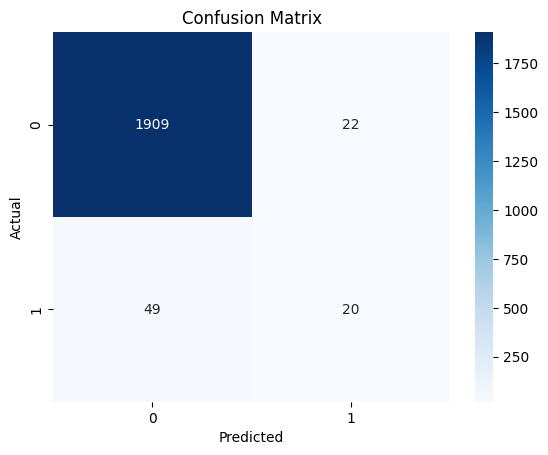

In [38]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Feature Importance
for name, metrics in results.items():
    model = metrics['model']
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        plt.figure(figsize=(6, 4))
        sns.barplot(x=importances, y=importances.index)
        plt.title(f"Feature Importance - {name}")
        plt.show()

In [41]:
#GridSearchCV on Random Forest
param_grid = {
   'n_estimators': [50, 100, 150],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [42]:
print("\n Best Parameters (Random Forest):", grid.best_params_)
y_pred_best = grid.predict(X_test)




 Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


In [43]:
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.59      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.78      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000

